# IMDB Data Analysis Report - SussexBudgetProductions

In this report, we aim to provide insightful analysis of the IMDB data to assist the CEO of SussexBudgetProductions in persuading investors and creating a blueprint for our next movie. This report is going to offer appropriate recommendations for the success of the next movie.

The primary goal is to find an independent variable can increase the profit of the next movie. To achieve this, we conducted the Exploratory Data Analysis (EDA) to observe the data and t-test to verify whether the variable is statistically significant.

In [1]:
"""
1. Importing several libraries in order to do the data cleansing, EDA process, and hypothesis testing
2. Setting the Pandas dataframe and reading the csv file to analyse a dataframe
"""

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', 28)

sns.set_context("notebook")
sns.set_style("whitegrid")

myfile = 'movie_metadata.csv'
pd.options.display.float_format = '{:.3f}'.format
original_df = pd.read_csv(myfile,index_col=None)
original_df

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.000,178.000,0.000,855.000,Joel David Moore,1000.000,760505847.000,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,4834,Wes Studi,0.000,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,3054.000,English,USA,PG-13,237000000.000,2009.000,936.000,7.900,1.780,33000
1,Color,Gore Verbinski,302.000,169.000,563.000,1000.000,Orlando Bloom,40000.000,309404152.000,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,0.000,goddess|marriage ceremony|marriage proposal|pi...,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,1238.000,English,USA,PG-13,300000000.000,2007.000,5000.000,7.100,2.350,0
2,Color,Sam Mendes,602.000,148.000,0.000,161.000,Rory Kinnear,11000.000,200074175.000,Action|Adventure|Thriller,Christoph Waltz,Spectre,275868,11700,Stephanie Sigman,1.000,bomb|espionage|sequel|spy|terrorist,http://www.imdb.com/title/tt2379713/?ref_=fn_t...,994.000,English,UK,PG-13,245000000.000,2015.000,393.000,6.800,2.350,85000
3,Color,Christopher Nolan,813.000,164.000,22000.000,23000.000,Christian Bale,27000.000,448130642.000,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,106759,Joseph Gordon-Levitt,0.000,deception|imprisonment|lawlessness|police offi...,http://www.imdb.com/title/tt1345836/?ref_=fn_t...,2701.000,English,USA,PG-13,250000000.000,2012.000,23000.000,8.500,2.350,164000
4,NaN,Doug Walker,NaN,NaN,131.000,NaN,Rob Walker,131.000,NaN,Documentary,Doug Walker,Star Wars: Episode VII - The Force Awakens ...,8,143,NaN,0.000,NaN,http://www.imdb.com/title/tt5289954/?ref_=fn_t...,NaN,NaN,NaN,NaN,NaN,NaN,12.000,7.100,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5038,Color,Scott Smith,1.000,87.000,2.000,318.000,Daphne Zuniga,637.000,NaN,Comedy|Drama,Eric Mabius,Signed Sealed Delivered,629,2283,Crystal Lowe,2.000,fraud|postal worker|prison|theft|trial,http://www.imdb.com/title/tt3000844/?ref_=fn_t...,6.000,English,Canada,NaN,NaN,2013.000,470.000,7.700,NaN,84
5039,Color,NaN,43.000,43.000,NaN,319.000,Valorie Curry,841.000,NaN,Crime|Drama|Mystery|Thriller,Natalie Zea,The Following,73839,1753,Sam Underwood,1.000,cult|fbi|hideout|prison escape|serial killer,http://www.imdb.com/title/tt2071645/?ref_=fn_t...,359.000,English,USA,TV-14,NaN,NaN,593.000,7.500,16.000,32000
5040,Color,Benjamin Roberds,13.000,76.000,0.000,0.000,Maxwell Moody,0.000,NaN,Drama|Horror|Thriller,Eva Boehnke,A Plague So Pleasant,38,0,David Chandler,0.000,NaN,http://www.imdb.com/title/tt2107644/?ref_=fn_t...,3.000,English,USA,NaN,1400.000,2013.000,0.000,6.300,NaN,16
5041,Color,Daniel Hsia,14.000,100.000,0.000,489.000,Daniel Henney,946.000,10443.000,Comedy|Drama|Romance,Alan Ruck,Shanghai Calling,1255,2386,Eliza Coupe,5.000,NaN,http://www.imdb.com/title/tt2070597/?ref_=fn_t...,9.000,English,USA,PG-13,NaN,2012.000,719.000,6.300,2.350,660


Initially, we examined the data without any structured data scientific processes. As a result, we observed that this data contains a lot of variables that we cannot control in the film planning and production timing such as 'num_critic_for_reviews','num_voted_users','facenumber_in_poster','num_user_for_reviews','imdb_score' etc. In addition, most of movies in these days are not a monochrome movie and 'move_imdb_link' variable is a just hyperlink to a website so with the 'plot_keywords	', the 'color' and 'move_imdb_link' variables can rarely offer actionable insights. Thus, the variables that we mentioned in this paragraph were excluded from the IMDB data.

Furthermore, we assigned categorical numbers to the values of categorical variables. At the same time, the values of string variables were converted into numerical values via unique number allocations. Likewise, we made dummy variables from the 'genres' for futher data analysis. Then we cleaned the duplicated values in the dataset that had same figures in 'move_title', 'title_year' and 'director_name' variables. Additionally, we created the 'profit' variable from the 'gross' and 'budget' variables.



In [2]:
"""
Creating a new dataset that only contains variables that we can control in the film planning and production timing
"""

df = original_df.loc[:, ['director_name', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title','cast_total_facebook_likes',
       'actor_3_name','language', 'country','content_rating', 
        'budget', 'title_year', 'actor_2_facebook_likes','aspect_ratio']].copy(deep = True)

In [3]:
"""
Creating a profit varaible (Subtracting the budget from the gross)
"""

df['profit'] = df['gross'] - df['budget']

In [4]:
"""
Making a new order for the Exploratory Data Analysis
"""

original_order = ['director_name', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title','cast_total_facebook_likes',
       'actor_3_name',
       'language', 'country',
       'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
       'aspect_ratio','profit']

new_order = ['profit', 'budget','director_name', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title','cast_total_facebook_likes',
       'actor_3_name',
       'language', 'country',
       'content_rating', 'title_year', 'actor_2_facebook_likes',
       'aspect_ratio']

df = df[new_order]

In [5]:
"""
Observing the new dataset through the info function (Data type, Value count)
"""

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 20 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   profit                     3891 non-null   float64
 1   budget                     4551 non-null   float64
 2   director_name              4939 non-null   object 
 3   duration                   5028 non-null   float64
 4   director_facebook_likes    4939 non-null   float64
 5   actor_3_facebook_likes     5020 non-null   float64
 6   actor_2_name               5030 non-null   object 
 7   actor_1_facebook_likes     5036 non-null   float64
 8   gross                      4159 non-null   float64
 9   genres                     5043 non-null   object 
 10  actor_1_name               5036 non-null   object 
 11  movie_title                5043 non-null   object 
 12  cast_total_facebook_likes  5043 non-null   int64  
 13  actor_3_name               5020 non-null   objec

In [6]:
"""
Observing the new dataset through the describe function (Mean, median, Standard deviation and so on)
"""

df.describe()

,profit,budget,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,cast_total_facebook_likes,title_year,actor_2_facebook_likes,aspect_ratio
count,3891.000,4551.000,5028.000,4939.000,5020.000,5036.000,4159.000,5043.000,4935.000,5030.000,4714.000
mean,5844716.965,39752620.436,107.201,686.509,645.010,6560.047,48468407.527,9699.064,2002.471,1651.754,2.220
std,226179411.240,206114898.449,25.197,2813.329,1665.042,15020.759,68452990.439,18163.799,12.475,4042.439,1.385
min,-12213298588.000,218.000,7.000,0.000,0.000,0.000,162.000,0.000,1916.000,0.000,1.180
25%,-10265176.500,6000000.000,93.000,7.000,133.000,614.000,5340987.500,1411.000,1999.000,281.000,1.850
50%,851636.000,20000000.000,103.000,49.000,371.500,988.000,25517500.000,3090.000,2005.000,595.000,2.350
75%,24751474.000,45000000.000,118.000,194.500,636.000,11000.000,62309437.500,13756.500,2011.000,918.000,2.350
max,523505847.000,12215500000.000,511.000,23000.000,23000.000,640000.000,760505847.000,656730.000,2016.000,137000.000,16.000


In [7]:
"""
Making dummy variables from the 'genres' variable
"""

genres = df['genres'].str.get_dummies('|',)
genres = genres.astype('bool')

df = pd.concat([df, genres], axis=1)

df.drop('genres', axis=1, inplace=True)
df

,profit,budget,director_name,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,actor_1_name,movie_title,cast_total_facebook_likes,actor_3_name,language,...,History,Horror,Music,Musical,Mystery,News,Reality-TV,Romance,Sci-Fi,Short,Sport,Thriller,War,Western
0,523505847.000,237000000.000,James Cameron,178.000,0.000,855.000,Joel David Moore,1000.000,760505847.000,CCH Pounder,Avatar,4834,Wes Studi,English,...,False,False,False,False,False,False,False,False,True,False,False,False,False,False
1,9404152.000,300000000.000,Gore Verbinski,169.000,563.000,1000.000,Orlando Bloom,40000.000,309404152.000,Johnny Depp,Pirates of the Caribbean: At World's End,48350,Jack Davenport,English,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,-44925825.000,245000000.000,Sam Mendes,148.000,0.000,161.000,Rory Kinnear,11000.000,200074175.000,Christoph Waltz,Spectre,11700,Stephanie Sigman,English,...,False,False,False,False,False,False,False,False,False,False,False,True,False,False
3,198130642.000,250000000.000,Christopher Nolan,164.000,22000.000,23000.000,Christian Bale,27000.000,448130642.000,Tom Hardy,The Dark Knight Rises,106759,Joseph Gordon-Levitt,English,...,False,False,False,False,False,False,False,False,False,False,False,True,False,False
4,NaN,NaN,Doug Walker,NaN,131.000,NaN,Rob Walker,131.000,NaN,Doug Walker,Star Wars: Episode VII - The Force Awakens ...,143,NaN,NaN,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5038,NaN,NaN,Scott Smith,87.000,2.000,318.000,Daphne Zuniga,637.000,NaN,Eric Mabius,Signed Sealed Delivered,2283,Crystal Lowe,English,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False
5039,NaN,NaN,NaN,43.000,NaN,319.000,Valorie Curry,841.000,NaN,Natalie Zea,The Following,1753,Sam Underwood,English,...,False,False,False,False,True,False,False,False,False,False,False,True,False,False
5040,NaN,1400.000,Benjamin Roberds,76.000,0.000,0.000,Maxwell Moody,0.000,NaN,Eva Boehnke,A Plague So Pleasant,0,David Chandler,English,...,False,True,False,False,False,False,False,False,False,False,False,True,False,False
5041,NaN,NaN,Daniel Hsia,100.000,0.000,489.000,Daniel Henney,946.000,10443.000,Alan Ruck,Shanghai Calling,2386,Eliza Coupe,English,...,False,False,False,False,False,False,False,True,False,False,False,False,False,False


In [8]:
"""
1. Assigning categorical numbers to the values of categorical variables (Except the genre variables)
2. Converting the values of string variables into numerical values via unique number allocations
3. Saving the original data values in a python dictionary just in case
"""

original_value = {}
list_for_dic = []

for col in df.columns:
    if df[col].dtypes == object:
        if df[col].isna().any() == True:
            unique_values = list(df[col].unique())
            unique_values.remove(np.nan)
        else: unique_values = list(df[col].unique())
        for i, v in zip(range(1, len(df[col])+1),list(unique_values)):
            a = [v,i]
            list_for_dic.append(a)
            df[col].replace(to_replace = v, value = i, inplace = True)
        original_value[col] = dict(list_for_dic)
        list_for_dic = []
        unique_values = []
    elif col == 'aspect_ratio':
        unique_values = list(df[col].unique())
        for i, v in zip(range(1, len(df[col])+1),list(unique_values)):
            a = [v,i]
            list_for_dic.append(a)
            df[col].replace(to_replace = v, value = i, inplace = True)
        original_value[col] = dict(list_for_dic)
        list_for_dic = []
        unique_values = []

In [9]:
"""
Extracting the continous variables from the dataset
"""

not_continuous_columns = list(original_value.keys())
not_continuous_columns.append("title_year")

continuous_columns = []
for c_c in df.columns:
    if c_c not in not_continuous_columns:
        if df[c_c].dtype != bool: 
            continuous_columns.append(c_c)

In [10]:
"""
Checking the duplicated values in the dataset
"""

df[df.duplicated()]

,profit,budget,director_name,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,actor_1_name,movie_title,cast_total_facebook_likes,actor_3_name,language,...,History,Horror,Music,Musical,Mystery,News,Reality-TV,Romance,Sci-Fi,Short,Sport,Thriller,War,Western
137,-55948241.000,180000000.000,10.000,110.000,282.000,103.000,26.000,11000.000,124051759.000,3.000,64,21175,58.000,1.000,...,False,False,False,False,False,False,False,True,False,False,False,False,False,False
187,172298923.000,120000000.000,112.000,115.000,386.000,12000.000,72.000,21000.000,292298923.000,84.000,174,59177,155.000,1.000,...,False,False,False,False,False,False,False,True,False,False,False,False,False,False
204,NaN,NaN,68.000,120.000,28.000,12.000,88.000,544.000,NaN,74.000,99,699,91.000,2.000,...,False,True,False,False,False,False,False,False,True,False,False,False,False,False
303,-115035182.000,150000000.000,97.000,111.000,456.000,394.000,123.000,20000.000,34964818.000,26.000,145,21393,130.000,1.000,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False
389,-63885779.000,120000000.000,148.000,100.000,128.000,78.000,198.000,596.000,56114221.000,138.000,247,1261,218.000,1.000,...,False,False,False,False,False,False,False,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4942,NaN,18000000.000,1218.000,93.000,261.000,697.000,225.000,783.000,NaN,99.000,2856,3700,478.000,1.000,...,False,True,False,False,False,False,False,False,False,False,False,True,False,False
4950,NaN,120000.000,2335.000,88.000,686.000,405.000,1101.000,847.000,NaN,380.000,4828,2364,3445.000,1.000,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4951,NaN,114000.000,233.000,96.000,0.000,56.000,2253.000,125.000,NaN,1480.000,3816,403,2665.000,1.000,...,False,True,False,False,True,False,False,False,False,False,False,False,False,False
4971,17721635.000,15000000.000,1096.000,114.000,29.000,616.000,347.000,956.000,32721635.000,1023.000,2609,3861,1897.000,1.000,...,False,True,False,False,False,False,False,False,False,False,False,True,False,False


In [11]:
"""
Dropping the duplicated values that have same figures in the 'move_title', 'title_year' and 'director_name' variables
"""

df.drop_duplicates(subset = ['movie_title','title_year','director_name'], keep = 'first', inplace = True)

Following that, we visulised the categorical variables through countplots, and the continuous variables using histograms and boxplots to inspect missing values and outliers. Consequently, a considerable number of missing values and outliers were discovered. These values have to be handled otherwise they could have adverse effects on the outcome of data analysis. Therefore, we determined to use the quartile method for outliers. Any values outside of the interquartile range (IQR) were replaced to missing value. The number of outliers were huge thus it has a high possibility to bring serious bad influences if a mean or median value substitute for outliers. So, we dropped the outliers with the missing values because the data collector allowed us to delete entire missing values.

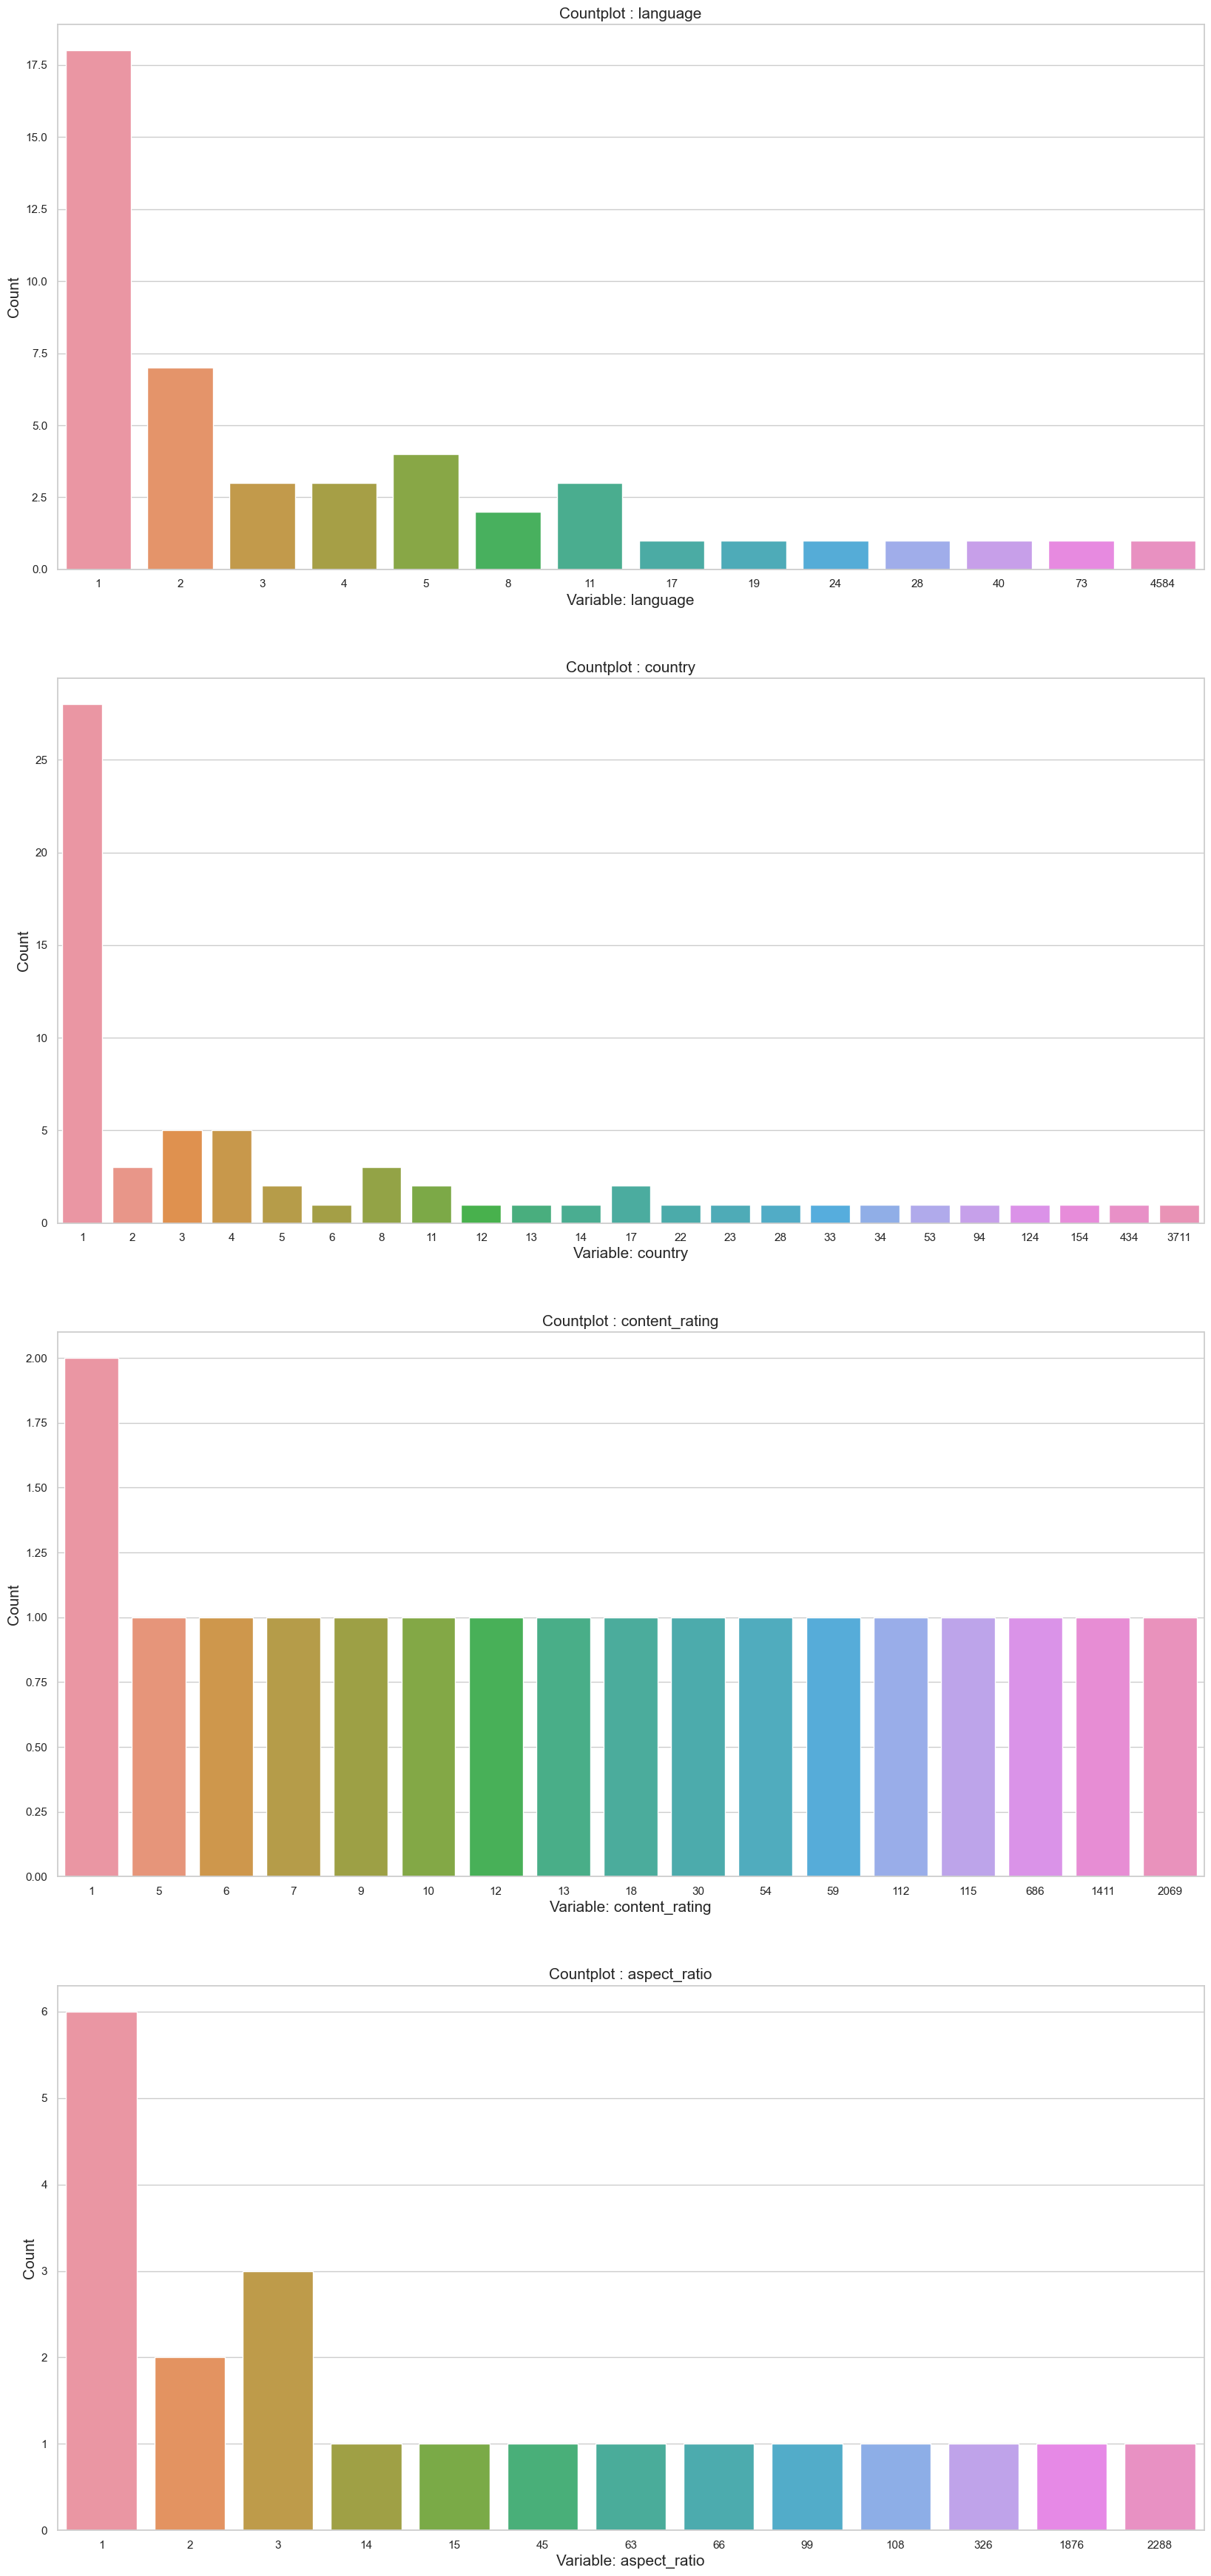

In [12]:
"""
Visulising the categorical variables using countplots in order to find any insights
"""

list_for_countplot = ["language", "country", "content_rating","aspect_ratio"]

fig, axes = plt.subplots(4,1, figsize = (20, 10))

for ax, col in zip(axes.flat, list_for_countplot):
    df_for_chart = pd.DataFrame(data = df[col].value_counts())
    sns.countplot(data = df_for_chart, x = col, ax = ax)
    ax.set_xlabel(f"Variable: {col}", fontsize = 15)
    ax.set_ylabel("Count", fontsize = 15)
    ax.set_title(f"Countplot : {col}", fontsize = 15)  

fig.set_figheight(fig.get_figheight() * len(list_for_countplot)*1.1)
plt.show()

In [ ]:
"""
Searching some original values to analyse the countplots
"""

search = 1
while search == 1:
    try:
        col = input('A variable name: ')
        key = int(input('Key value: '))
        key -= 1
        a = list(original_value[col].items())[key][0]
        print(f'{key+1} in {col} is {a}')
        search_check = int(input('Search again = 1 | Quit = -1: '))
        if search_check == 1:
            search = 1
        elif search_check == -1:
            search = -1
            break
        else:
            print("Please put a right value!")
    except ValueError and KeyError:
        print("Please put a right value!")

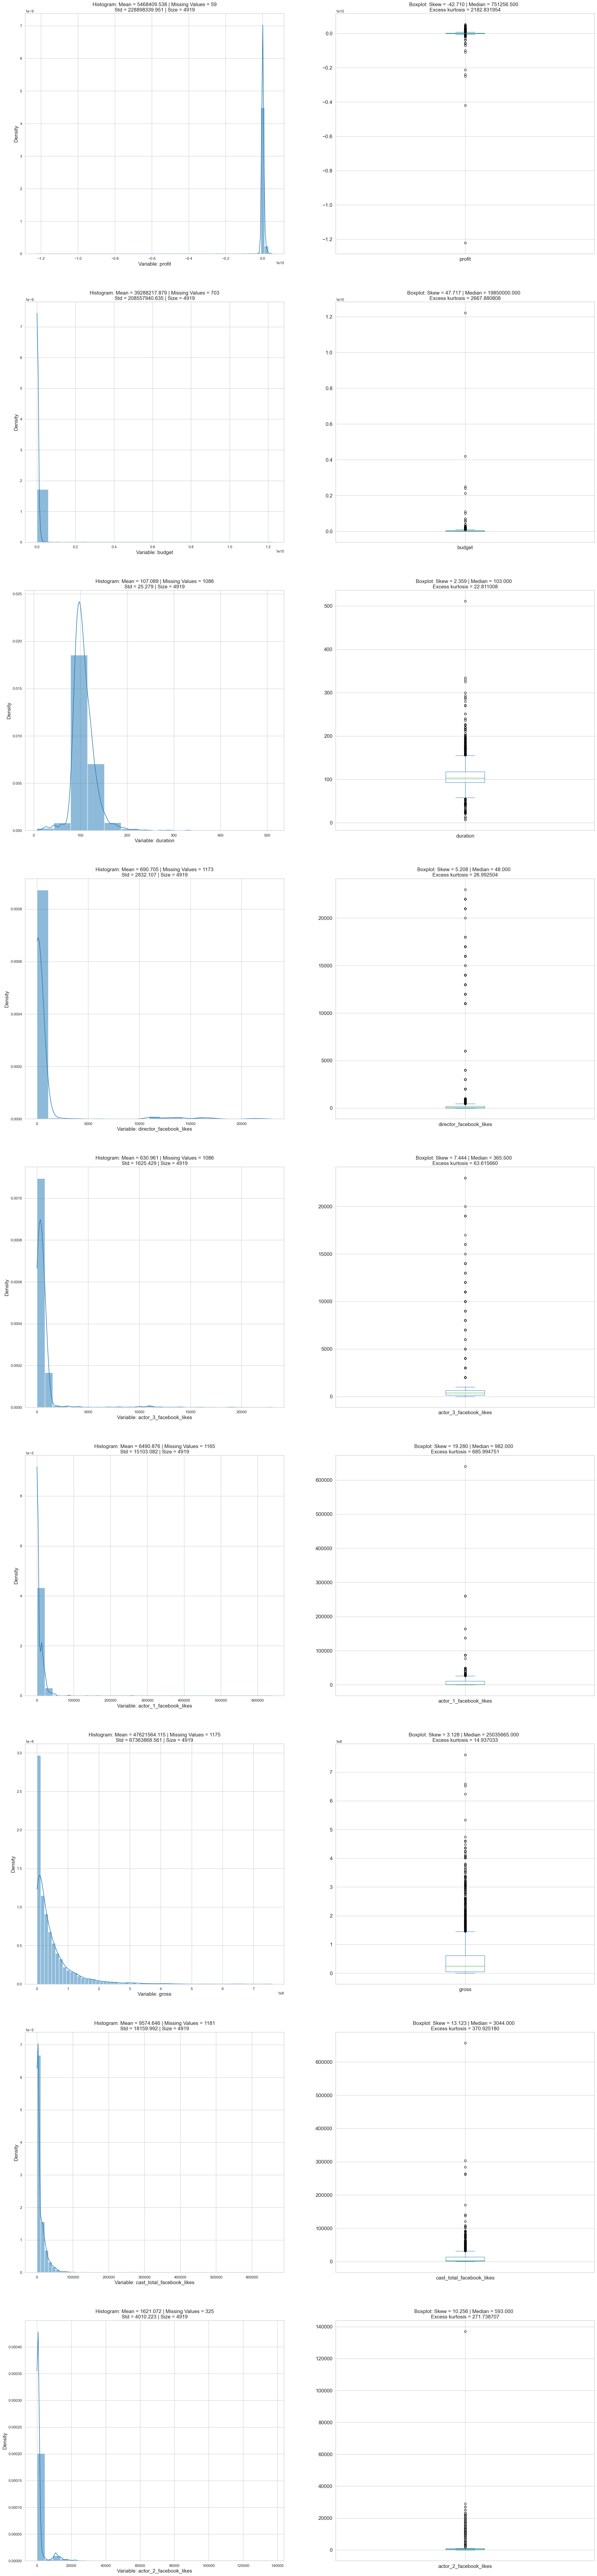

In [14]:
"""
Visulising the continuous variables using histograms and boxplots 
in order to observe the data and discover the missing values and outliers
"""

fig, axes = plt.subplots(len(continuous_columns), 2, figsize = (30, 10))

for idx, col in enumerate(continuous_columns):
    for idx2 in range(2):
        # Histograms
        if idx2 == 0:
            n_missing = df[df.isna().any(axis=1)].count()[idx]
            vals = round(np.size(df[col].unique()) / np.sqrt(np.size(df[col].unique())))
            sns.histplot(data=df,ax=axes[idx,idx2],bins=vals,kde=True,x=col,stat="density")
            mean = df[col].mean()
            std = df[col].std(ddof=1)
            axes[idx,idx2].set_xlabel(f"Variable: {col}", fontsize = 15)
            axes[idx,idx2].set_ylabel("Density", fontsize = 15)
            axes[idx,idx2].set_title(f"Histogram: Mean = {mean:.3f} | Missing Values = {n_missing}\nStd = {std:.3f} | Size = {len(df)}", fontsize = 15)  
        # Boxplots
        elif idx2 == 1:
            df[col].plot(kind="box",ax=axes[idx,idx2], fontsize = 15)
            median = df[col].median()
            skew = df[col].skew()
            kurt = df[col].kurtosis()
            axes[idx,idx2].set_ylabel("", fontsize = 15)
            axes[idx,idx2].set_title(f"Boxplot: Skew = {skew:.3f} | Median = {median:.3f}  \nExcess kurtosis = {kurt:3f}", fontsize = 15)

fig.set_figheight(fig.get_figheight() * len(continuous_columns)*1.5)           
plt.show()

In [ ]:
"""
Finding the missing values from the dataset
"""

df[df.isna().any(axis=1)]

In [15]:
"""
1. Using the quartile method for outliers and defining IQR as the difference between the 75th and 25th percentiles of the data 
2. Replacing the values outside of the IQR to missing value 'NaN' using NumPy
3. Deleting the entire missing values and re-setting the index by using the dropna function wand the reset_index function
"""

for col in continuous_columns:
    qr25 = df[col].quantile(.25)
    qr75 = df[col].quantile(.75)
    size1 = df[col].count()
    iqr = qr75 - qr25
    lower_bound = qr25 - 1.5 * iqr
    upper_bound = qr75 + 1.5 * iqr
    df[col] = np.where((df[col] < lower_bound) | (df[col] > upper_bound) | (df[col] == 0), np.nan, df[col])
    size2 = df[col].count()
    print(f"The variable {col} had {size1 - size2} outliers")

df.dropna(inplace = True)
print("\n The missing values and outliers have been deleted")
df.reset_index(drop=True, inplace = True)

The variable profit had 429 outliers
The variable budget had 344 outliers
The variable duration had 236 outliers
The variable director_facebook_likes had 1484 outliers
The variable actor_3_facebook_likes had 250 outliers
The variable actor_1_facebook_likes had 188 outliers
The variable gross had 292 outliers
The variable cast_total_facebook_likes had 371 outliers
The variable actor_2_facebook_likes had 666 outliers

 The missing values and outliers have been deleted


In [16]:
"""
Checking that the dataset still has any missing value
"""

df[df.isna().any(axis=1)].count()

profit                       0
budget                       0
director_name                0
duration                     0
director_facebook_likes      0
actor_3_facebook_likes       0
actor_2_name                 0
actor_1_facebook_likes       0
gross                        0
actor_1_name                 0
movie_title                  0
cast_total_facebook_likes    0
actor_3_name                 0
language                     0
country                      0
content_rating               0
title_year                   0
actor_2_facebook_likes       0
aspect_ratio                 0
Action                       0
Adventure                    0
Animation                    0
Biography                    0
Comedy                       0
Crime                        0
Documentary                  0
Drama                        0
Family                       0
Fantasy                      0
Film-Noir                    0
Game-Show                    0
History                      0
Horror  

On the other hand, we implemented normality tests, aiming to prove whether the continuous variables in the dataset follow a statistically Gaussian distribution. As a consequence of Probability–probability (P-P) plot, Lilliefors test and Normality test, we figured out there is no evidence that the continuous variables in the dataset follow a statistically normal distribution at the 0.1% significance level. This conclusion was drawn based on the observation that every p-value associated with each variable was below the significance level, leading to the rejection of the null hypothesis that it is normally distributed.

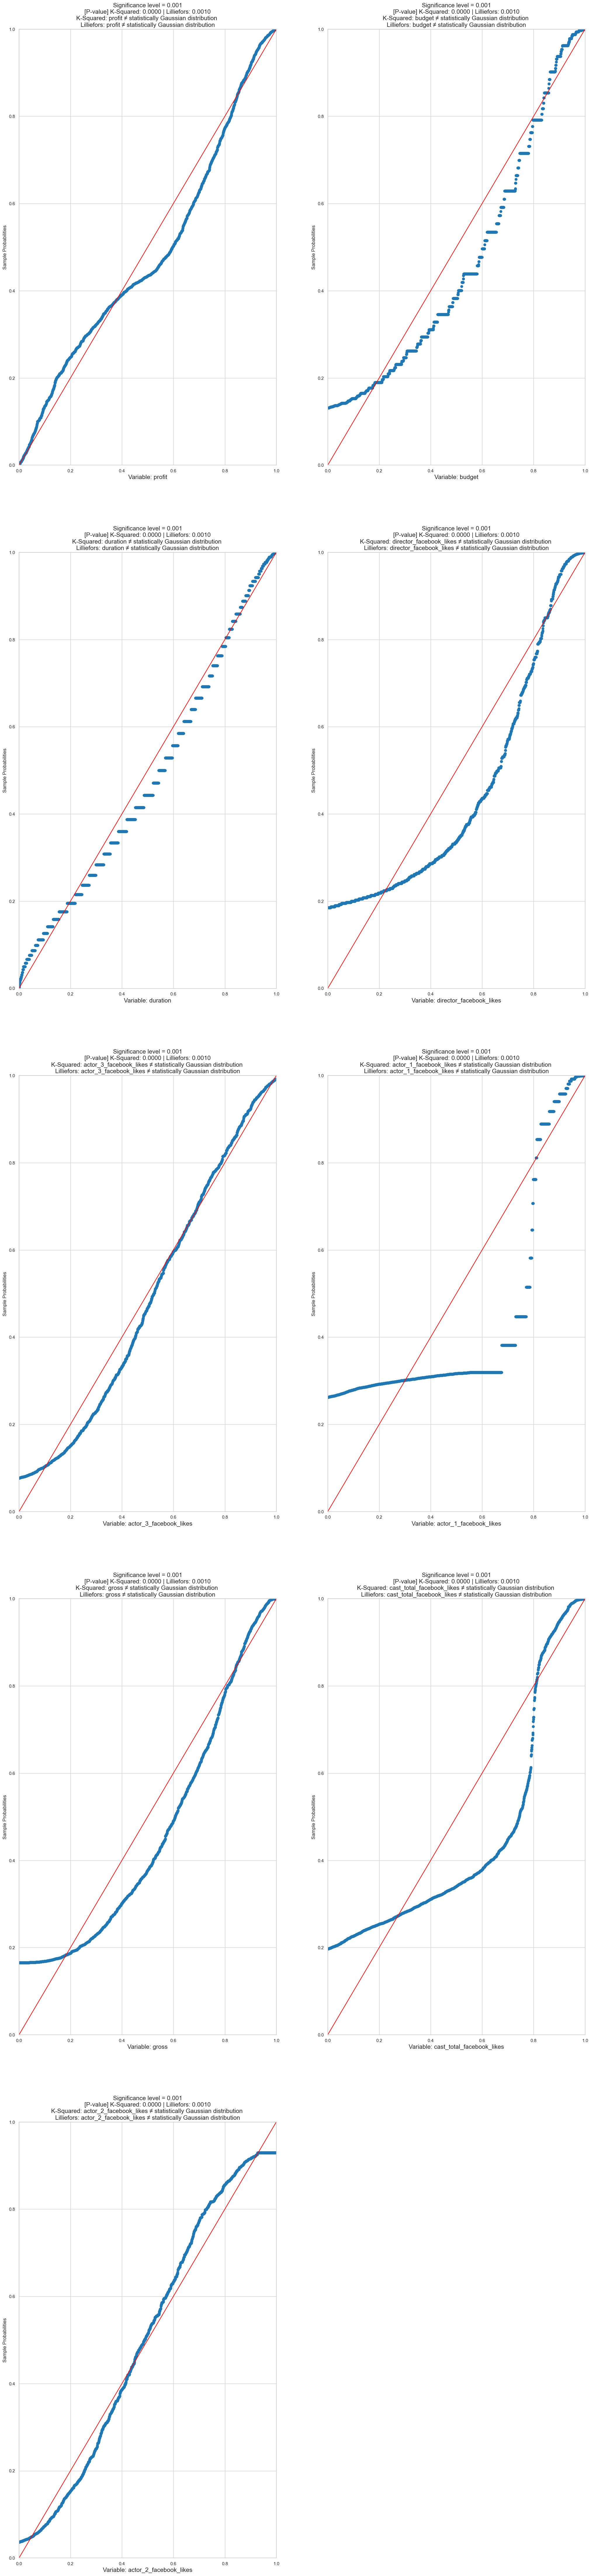

In [19]:
"""
1. Conducting Lilliefors and D-Agostino’s K-squared test to inspect that whether the continuous variables in the dataset follow 
a statistically Gaussian distribution
2. Drawing plots by using P-P plot with the results of the normality tests
"""

from statsmodels.stats.diagnostic import lilliefors
from scipy.stats import normaltest
import statsmodels.api as sm
from scipy.stats import norm

significance_level = 0.001
yes_or_no = ""
yes_or_no2 = ""

fig, axes = plt.subplots(5, 2, figsize = (25,5))

for idx, col in zip(axes.flat, continuous_columns):
    
    # Normality tests : Lilliefors and D-Agostino’s K-squared test
    _, p_value = lilliefors(df[col],dist="norm")
    _2, p_value2 = normaltest(df[col])
    
    if p_value > significance_level:
        yes_or_no = f"Lilliefors: {col} = statistically Gaussian distribution"
    else:
        yes_or_no = f"Lilliefors: {col} ≠ statistically Gaussian distribution"
        
    if p_value2 > significance_level:
        yes_or_no2 = f"K-Squared: {col} = statistically Gaussian distribution"
    else:
        yes_or_no2 = f"K-Squared: {col} ≠ statistically Gaussian distribution"

    # P-P plot 
    pp_x = sm.ProbPlot(df[col], dist=norm, fit=True)
    pp_x.ppplot(line="45", ax=idx)
    idx.set_title(f"Significance level = {significance_level}\n[P-value] K-Squared: {p_value2:.4f} | Lilliefors: {p_value:.4f}\n{yes_or_no2} \n{yes_or_no}", fontsize = 15)
    idx.set_xlabel(f"Variable: {col}", fontsize = 15)

fig.set_figheight(fig.get_figheight() * len(continuous_columns)*2.5)
fig.delaxes(axes[4][1])
plt.show()

Following the data cleansing process, the top 10 movies in high profit were analysed by the data team. Although the maximum budget will be £1.5 million, we have decided to examine all budget ranges to prevent data bias. Interestingly, 9 out of these 10 movies were produced in the United States and all of them are an English movie. Moreover, 9 of these movies had a budget exceeding £20 million and in 6 of the top 10 movies, actor 3 received more Facebook likes than the mean value of this variable.

Meanwhile, the correlation matrix was drawn to identify relationships between the continuous variables. By examining the correlation matrix, we found out that the profit has positive correlations with 'gross','aspect_ratio', 'movie_title', 'actor_3_facebook_likes' variables and some of the genres.

The goal of data analysis is to discover a variable that the company can control it during the film planning and production timing. Accordingly, we have focused on the "actor_3_facebook_likes" variable even if it has a small positive correlation coefficient, 0.076, with the profit but has meaningful figures in the top 10 movies in high profit.

In [20]:
"""
Observing the dataset through the describe function after we eliminated the missing, duplicated values, and outliers
"""

df.describe()

,profit,budget,director_name,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,actor_1_name,movie_title,cast_total_facebook_likes,actor_3_name,language,country,content_rating,title_year,actor_2_facebook_likes,aspect_ratio
count,1889.000,1889.000,1889.000,1889.000,1889.000,1889.000,1889.000,1889.000,1889.000,1889.000,1889.000,1889.000,1889.000,1889.000,1889.000,1889.000,1889.000,1889.000,1889.000
mean,3884529.763,23205376.518,859.570,103.004,99.441,376.046,1205.349,3782.476,27089906.282,629.335,2485.845,5429.673,1503.195,1.554,2.742,2.901,2003.102,550.669,7.408
std,22595705.817,20714462.996,580.218,13.974,108.711,262.368,749.179,5919.367,27838498.137,526.931,1208.701,6325.456,879.049,3.546,6.024,2.006,9.287,304.818,2.834
min,-61539010.000,1100.000,13.000,63.000,2.000,2.000,1.000,11.000,162.000,1.000,213.000,29.000,1.000,1.000,1.000,1.000,1929.000,3.000,1.000
25%,-8743723.000,7000000.000,392.000,93.000,19.000,145.000,592.000,624.000,4280577.000,192.000,1478.000,1460.000,761.000,1.000,1.000,1.000,1999.000,288.000,5.000
50%,124220.000,17000000.000,732.000,101.000,54.000,354.000,1084.000,957.000,18317151.000,495.000,2466.000,2822.000,1405.000,1.000,1.000,3.000,2004.000,561.000,5.000
75%,15581633.000,35000000.000,1244.000,111.000,148.000,569.000,1721.000,3000.000,40334024.000,954.000,3437.000,5668.000,2141.000,1.000,1.000,4.000,2009.000,826.000,10.000
max,75724075.000,95000000.000,2393.000,153.000,460.000,1000.000,3032.000,26000.000,144156464.000,2097.000,4917.000,30541.000,3521.000,44.000,57.000,18.000,2016.000,1000.000,22.000


In [21]:
"""
Sorting the dataframe based on the profit (Descending order) and printing the top 10 movies in terms of high profit
"""

df.sort_values(by='profit',ascending=False).head(10)

,profit,budget,director_name,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,actor_1_name,movie_title,cast_total_facebook_likes,actor_3_name,language,...,History,Horror,Music,Musical,Mystery,News,Reality-TV,Romance,Sci-Fi,Short,Sport,Thriller,War,Western
321,75724075.000,41000000.000,424.000,110.000,161.000,196.000,91.000,1000.000,116724075.000,482.000,1168,1954.000,948.000,1.000,...,False,False,True,False,False,False,False,False,False,False,False,False,False,False
516,75502246.000,38000000.000,16.000,99.000,188.000,436.000,975.000,1000.000,113502246.000,328.000,1581,3696.000,1225.000,1.000,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False
631,75241322.000,25000000.000,397.000,123.000,108.000,239.000,1182.000,1000.000,100241322.000,385.000,1819,1690.000,1211.000,1.000,...,False,False,False,False,False,False,False,True,False,False,False,False,False,False
186,74769345.000,54000000.000,52.000,95.000,293.000,744.000,230.000,851.000,128769345.000,97.000,833,3155.000,394.000,1.000,...,False,False,False,False,False,False,False,True,True,False,False,False,False,False
786,74497271.000,20000000.000,154.000,91.000,67.000,597.000,757.000,2000.000,94497271.000,158.000,2139,4729.000,1588.000,1.000,...,False,False,False,False,False,False,False,True,False,False,False,False,False,False
309,74006080.000,42000000.000,498.000,124.000,50.000,427.000,792.000,8000.000,116006080.000,219.000,1146,9255.000,930.000,1.000,...,False,False,False,False,False,False,False,True,False,False,False,False,False,False
82,72656464.000,71500000.000,292.000,85.000,84.000,595.000,429.000,1000.000,144156464.000,49.000,575,4166.000,492.000,1.000,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False
497,72632573.000,32000000.000,72.000,123.000,226.000,796.000,1023.000,3000.000,104632573.000,227.000,1527,5975.000,1192.000,1.000,...,False,False,False,False,False,False,False,True,True,False,False,False,False,False
719,71800000.000,8200000.000,854.000,107.000,71.000,304.000,688.000,967.000,80000000.000,773.000,2007,1962.000,1510.000,1.000,...,False,False,True,False,False,False,False,True,False,False,False,False,False,False
83,71204016.000,70000000.000,50.000,132.000,357.000,212.000,433.000,14000.000,141204016.000,128.000,580,14790.000,497.000,1.000,...,False,False,False,False,False,False,False,False,False,False,False,True,False,False


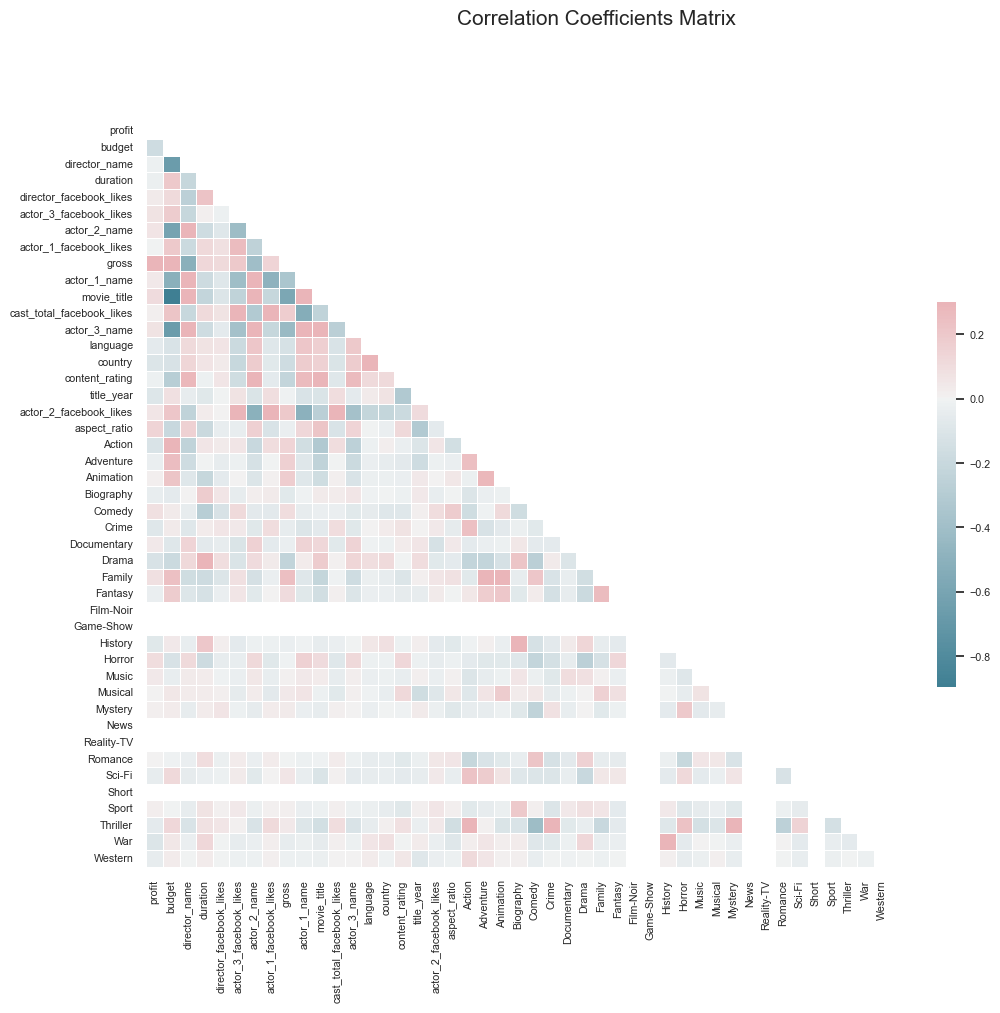

In [22]:
"""
Creating the correlation coefficients matrix using the heatmap in the Seaborn library
"""

sns.set(style='white',font_scale = 0.7)
corr = df.corr(numeric_only=True)
mask = np.zeros_like(corr, dtype = np.bool_)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize = (12,10))
f.suptitle('Correlation Coefficients Matrix', fontsize = 15)
cmap = sns.diverging_palette(220,10, as_cmap = True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0, square=True,linewidths=.5,cbar_kws={'shrink':.5},yticklabels=1)
plt.show()

In [23]:
"""
Sorting and checking the top 5 correlation coefficients values based on the variable 'profit' (Descending order)
"""

corr.sort_values(by='profit', ascending=False).head(15)

,profit,budget,director_name,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,actor_1_name,movie_title,cast_total_facebook_likes,actor_3_name,language,...,History,Horror,Music,Musical,Mystery,News,Reality-TV,Romance,Sci-Fi,Short,Sport,Thriller,War,Western
profit,1.000,-0.176,-0.021,-0.027,0.037,0.076,0.065,-0.002,0.681,0.039,0.106,0.017,0.068,-0.059,...,-0.083,0.099,0.046,0.002,0.017,NaN,NaN,0.001,-0.044,NaN,0.022,-0.057,-0.100,-0.048
gross,0.681,0.601,-0.513,0.123,0.117,0.198,-0.404,0.145,1.000,-0.348,-0.580,0.178,-0.439,-0.132,...,-0.034,-0.010,0.009,0.040,0.038,NaN,NaN,-0.006,0.054,NaN,0.019,0.046,-0.045,-0.019
aspect_ratio,0.143,-0.204,0.158,-0.192,-0.039,-0.038,0.165,-0.119,-0.036,0.128,0.220,-0.116,0.143,-0.001,...,-0.071,-0.016,0.007,0.048,-0.080,NaN,NaN,0.057,-0.037,NaN,0.015,-0.160,-0.083,-0.015
movie_title,0.106,-0.896,0.774,-0.226,-0.105,-0.238,0.714,-0.215,-0.580,0.615,1.000,-0.245,0.752,0.168,...,-0.042,0.107,0.032,-0.014,-0.049,NaN,NaN,-0.011,-0.110,NaN,-0.016,-0.150,-0.053,-0.024
Horror,0.099,-0.121,0.112,-0.177,-0.045,-0.040,0.122,-0.082,-0.010,0.154,0.107,-0.084,0.120,-0.015,...,-0.066,1.000,-0.084,-0.045,0.193,NaN,NaN,-0.204,0.121,NaN,-0.087,0.233,-0.058,-0.042
Comedy,0.086,0.036,-0.049,-0.288,-0.123,0.115,-0.067,-0.064,0.097,-0.046,-0.035,-0.032,-0.077,-0.054,...,-0.131,-0.231,-0.026,0.049,-0.240,NaN,NaN,0.218,-0.101,NaN,0.014,-0.417,-0.087,-0.040
Family,0.082,0.241,-0.164,-0.177,-0.099,0.083,-0.138,-0.031,0.245,-0.091,-0.220,-0.012,-0.174,-0.025,...,-0.048,-0.127,0.006,0.158,-0.077,NaN,NaN,-0.049,0.049,NaN,0.061,-0.201,-0.038,-0.020
actor_3_facebook_likes,0.076,0.184,-0.210,0.011,-0.015,1.000,-0.417,0.262,0.198,-0.411,-0.238,0.411,-0.379,-0.185,...,-0.057,-0.040,-0.034,-0.053,-0.019,NaN,NaN,0.033,0.038,NaN,0.043,0.008,-0.050,-0.015
actor_3_name,0.068,-0.665,0.614,-0.172,-0.064,-0.379,0.637,-0.216,-0.439,0.578,0.752,-0.268,1.000,0.196,...,-0.005,0.120,0.023,0.018,0.002,NaN,NaN,-0.013,-0.062,NaN,-0.018,-0.113,-0.018,0.005
actor_2_name,0.065,-0.615,0.599,-0.174,-0.086,-0.417,1.000,-0.250,-0.404,0.628,0.714,-0.310,0.637,0.214,...,-0.020,0.122,0.048,0.025,-0.051,NaN,NaN,-0.032,-0.077,NaN,-0.025,-0.113,-0.027,-0.013


To validate the variable, we extracted the value of 'profit' variable and 'actor_3_facebook_likes' from the dataset and split the data into two different groups based on the median of the 'actor_3_facebook_likes' variable which is 354: the group1 has more than 354 Facebook likes and the group2 has equal or less than 354 Facebook likes. Then we formulated a null hypothesis and an alternative hypothesis. The null hypothesis postulates that there is no difference in the mean of 'profit' between the group1 and group2. Conversely, the alternative hypothesis suggests that a statistically significant difference exists in the mean of 'profit,' particularly with the expectation that the mean of group1 is greater than the mean of group2.

\begin{align*}
\\\mathbf{H}_0\quad &: \quad \mu_1-\mu_2 = 0 \\
\mathbf{H}_1 \quad &: \quad \mu_1-\mu_2>0
\end{align*}


where $\mu_1$ represents the mean of the profit in group1 and $\mu_2$ denotes the mean of the profit in group2.

In [24]:
"""
Making a new dataframe called 'df2' which only contains the 'profit' and 'actor_3_facebook_likes' variables 
using the copy function with deep parameter
"""

df2 = df[['profit','actor_3_facebook_likes']].copy(deep=True)
df2

,profit,actor_3_facebook_likes
0,-52305212.000,241.000
1,200000.000,393.000
2,-8102818.000,329.000
3,-44197339.000,442.000
4,-18851301.000,330.000
...,...,...
1884,2831622.000,7.000
1885,177467.000,10.000
1886,131507.000,45.000
1887,417760.000,8.000


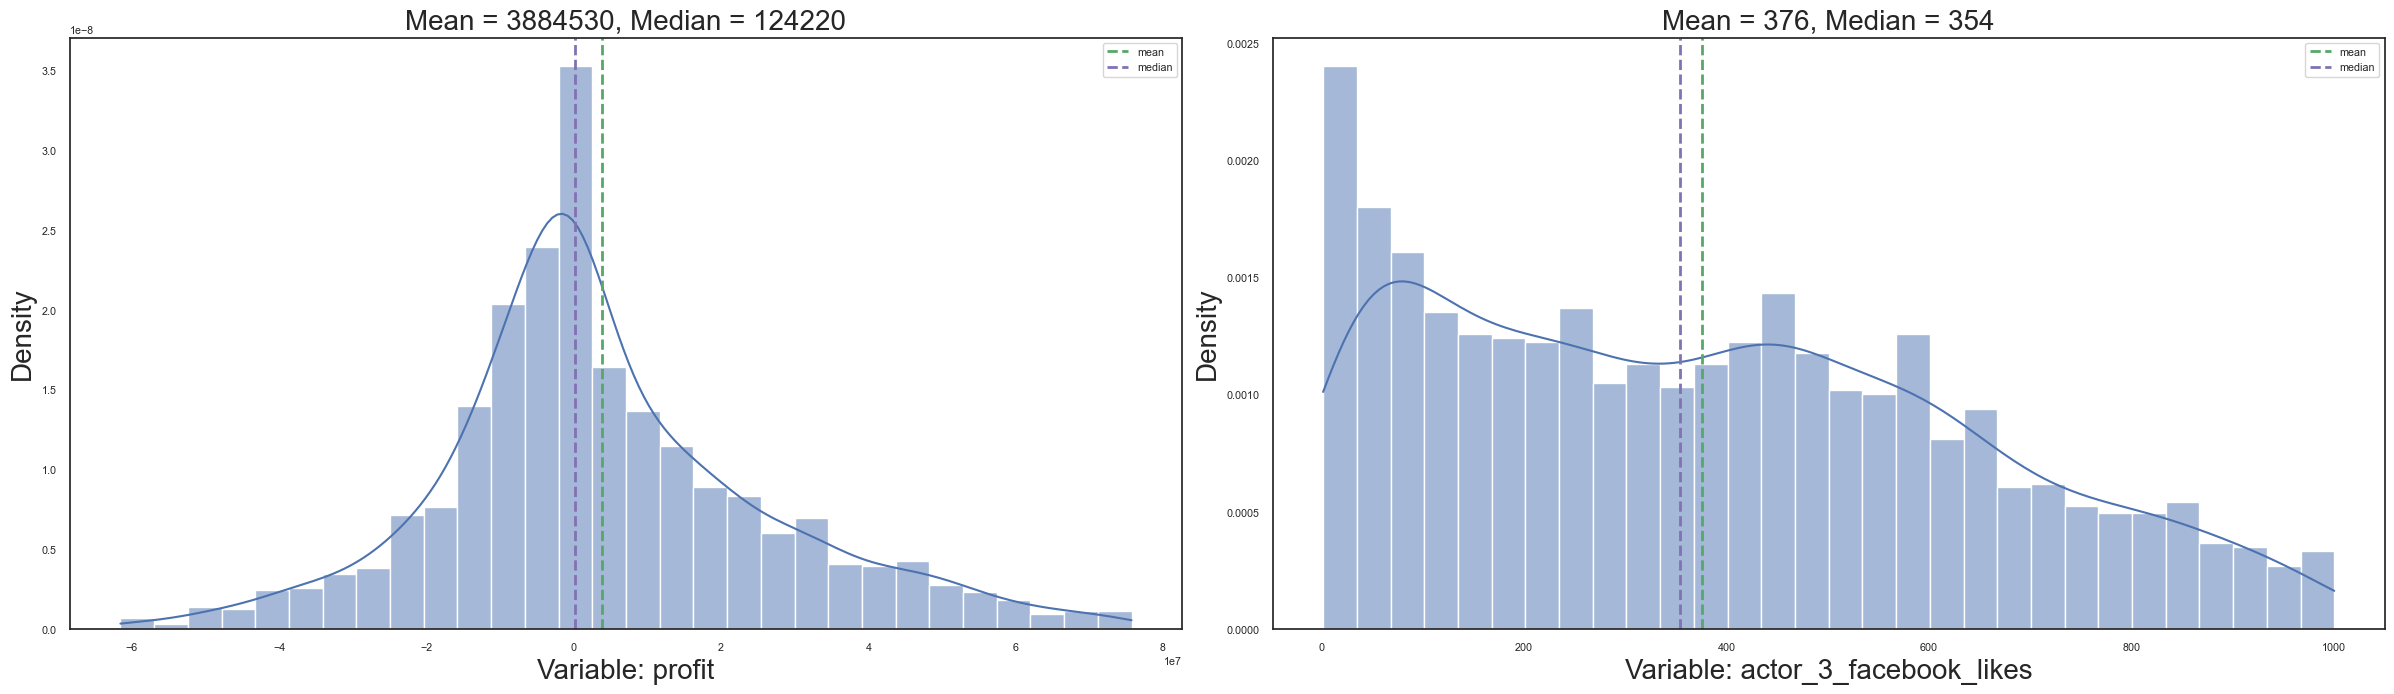

In [25]:
"""
Drawing histograms to observe the dataframe 
(Shape of the dataframe, the mean and median values)
"""

fig, axes = plt.subplots(1,2, figsize=(24,7))
plt.ticklabel_format(style='plain', axis='both')

for ax, col in zip(axes.flat, df2.columns):
    sns.histplot(df2[col], ax=ax, kde = True, bins = 30, stat="density")
    mean = df2[col].mean()
    median = df2[col].median()
    ax.axvline(mean,ls="--",color="g", lw=2, label="mean") 
    ax.axvline(median,ls="--",color="m", lw=2, label="median") 
    ax.set_xlabel(f"Variable: {col}", fontsize = 20)
    ax.set_ylabel("Density", fontsize = 20)
    ax.set_title(f"Mean = {mean:.0f}, Median = {median:.0f}", fontsize = 20.0)
    ax.legend()

plt.tight_layout()
plt.show()

In [26]:
"""
Extracting indexes from the dataframe based on the median value of the 'actor_3_facebook_likes'
"""

group_1_indexes = []
group_2_indexes = []
for i in range(len(df2)):
    if df2.actor_3_facebook_likes[df2.index == i].values > df2.actor_3_facebook_likes.median():
        group_1_indexes.append(i)
    else: group_2_indexes.append(i)

In [27]:
"""
1. Splitting the dataframe based on the group 1 indexes and group 2 indexes
2. The group1 has more than 354 Facebook likes and the group2 has equal or less than 354 Facebook likes
3. Each group only has the value of the 'profit' variable
"""

df2_group1 = df2.iloc[group_1_indexes, 0]
df2_group2 = df2.iloc[group_2_indexes, 0]

According to the previous normality tests, the dataset does not follow a statistically Gaussian distribution in any continuous variables, it implies that the two sample groups are not normally distributed either. Therefore, we tested the data utilising the bootstrapping and the independent t-test at the 1% significance level. The bootstrapping is often utilised when a dataset does not follow a normal distribution.

As a result, the analysis yielded a t-statistic of 253.00 and a p-value of 0.0000. Consequently, we could reject the null hypothesis because the p-value 0.0000 is smaller than the significance level 0.01 (1%). So, we can conclude that the 'actor_3_facebook_likes' variable is statistically significant to enhance the profit of the next movie.

In [28]:
"""
1. Conducting the bootstrapping because the variables do not follow a statistically Gaussian distribution
2. Testing the variable "actor_3_facebook_likes" using the independent t-test
"""
import scipy.stats as stats

# Bootstrapping
significance_level = 0.01 
n_bootstrap = 10000
np.random.seed(101)

columns = 'actor_3_facebook_likes'

df2_group1 = np.array(df2_group1)
df2_group2 = np.array(df2_group2)

size1 = len(df2_group1) 
data1 = np.array([np.mean(df2_group1[np.random.randint(0,size1,size=size1)]) for _ in range(n_bootstrap)])

size2 = len(df2_group2)
data2 = np.array([np.mean(df2_group2[np.random.randint(0,size2,size=size2)]) for _ in range(n_bootstrap)])


# Independent samples t-test
_, p_value = stats.ttest_ind(data1, data2, alternative='greater', random_state = 101)

if p_value < significance_level:
    print(f"P-value {p_value:.4f} is smaller than the significance_level {significance_level} (T-statistic: {_:.4f})\nSo, the variable '{columns}' is statistically significance to raise the profit of our next movie")
else:
    print(f"P-value {p_value:.4f} is greater than the significance_level {significance_level} (T-statistic: {_:.4f})\nSo, the variable '{columns}' is statistically not significance to raise the profit of our next movie")

P-value 0.0000 is smaller than the significance_level 0.01 (T-statistic: 253.0003)
So, the variable 'actor_3_facebook_likes' is statistically significance to raise the profit of our next movie


# Summary

In conclusion, the data team conducted Exploratory Data Analysis, bootstrapping, and an independent t-test to identify a variable that correlates with improving the next movie's profit.

The result of the hypothesis test highlights the significance of the 'actor_3_facebook_likes' variable in influencing the next movie's profit. Therefore, we highly recommend considering the hiring of a second main supporting actor with a substantial number of Facebook Likes. This strategic decision is expected to enhance the possibility of success in the next movie.